# Mosquito & Land Cover Stats
This lesson shows how to investigate the GLOBE data, calculate statistics, and create charts & maps.

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Mosquito

Let's load the data. If you get a `DataSourceError`, it may be because the data has not finished uploading. Wait a few seconds (see the bottom left corner of your screen to know when the data has finished uploading) and then run the cell again.

In [2]:
mosquito = gpd.read_file('https://github.com/geo-di-lab/emerge-lessons/raw/refs/heads/main/docs/data/globe_mosquito.zip')
mosquito.head()

,CountryCode,CountryName,Elevation,AbdomenCloseupPhotoUrls,BreedingGroundEliminated,Comments,DataSource,ExtraData,Genus,GlobeTeams,LarvaFullBodyPhotoUrls,LarvaeCount,LastIdentifyStage,LocationAccuracyM,LocationMethod,MeasuredAt,MeasurementElevation,MeasurementLatitude,MeasurementLongitude,MosquitoAdults,MosquitoEggs,MosquitoHabitatMapperId,MosquitoPupae,Species,Userid,WaterSource,WaterSourcePhotoUrls,WaterSourceType,OrganizationId,OrganizationName,Protocol,SiteId,SiteName,MeasuredDate,LarvaeCountProcessed,geometry
0,BRA,Brazil,6.3,None,false,None,GLOBE Observer App,LarvaeVisibleNo,None,[COLUNSLZ],None,0,None,13,automatic,2024-12-31 17:16:00,0,-2.5617,-44.2657,None,None,46287,false,None,137422629,ovitrap,https://data.globe.gov/system/photos/2024/12/3...,container: artificial,17459532,Brazil Citizen Science,mosquito_habitat_mapper,371514,23MNT816168,2024-12-31,0.0,POINT (-44.26597 -2.56197)
1,BRA,Brazil,6.3,None,false,None,GLOBE Observer App,LarvaeVisibleNo,None,[COLUNSLZ],None,0,None,13,automatic,2024-12-31 17:20:00,0,-2.5617,-44.2657,None,None,46290,false,None,137422629,ovitrap,https://data.globe.gov/system/photos/2024/12/3...,container: artificial,17459532,Brazil Citizen Science,mosquito_habitat_mapper,371514,23MNT816168,2024-12-31,0.0,POINT (-44.26597 -2.56197)
2,BRA,Brazil,7.4,None,true,None,GLOBE Observer App,LarvaeVisibleNo,None,[COLUNSLZ],None,0,None,51,automatic,2024-12-31 22:32:00,0,-2.5163,-44.3023,None,None,46482,false,None,137420190,"cement, metal or plastic tank",None,container: artificial,17459532,Brazil Citizen Science,mosquito_habitat_mapper,372864,23MNT775218,2024-12-31,0.0,POINT (-44.30288 -2.51676)
3,BRA,Brazil,20.6,None,true,None,GLOBE Observer App,LarvaeVisibleNo,None,[COLUNSLZ],None,0,None,66,automatic,2024-12-31 00:05:00,0,-2.8639,-44.0549,None,None,46203,false,None,137419937,can or bottle,None,container: artificial,17459532,Brazil Citizen Science,mosquito_habitat_mapper,373085,23MPS050834,2024-12-31,0.0,POINT (-44.05526 -2.86396)
4,BRA,Brazil,20.6,None,true,None,GLOBE Observer App,LarvaeVisibleNo,None,[COLUNSLZ],None,0,None,28,automatic,2024-12-31 00:23:00,0,-2.8639,-44.0550,None,None,46223,false,None,137419937,lake,None,still: lake/pond/swamp,17459532,Brazil Citizen Science,mosquito_habitat_mapper,373085,23MPS050834,2024-12-31,0.0,POINT (-44.05526 -2.86396)


See the list of columns:

In [5]:
mosquito.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 43009 entries, 0 to 43008
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CountryCode               42925 non-null  object        
 1   CountryName               42925 non-null  object        
 2   Elevation                 43009 non-null  object        
 3   AbdomenCloseupPhotoUrls   874 non-null    object        
 4   BreedingGroundEliminated  42948 non-null  object        
 5   Comments                  4001 non-null   object        
 6   DataSource                43009 non-null  object        
 7   ExtraData                 12445 non-null  object        
 8   Genus                     4364 non-null   object        
 9   GlobeTeams                16259 non-null  object        
 10  LarvaFullBodyPhotoUrls    8632 non-null   object        
 11  LarvaeCount               24689 non-null  object        
 12  LastIdenti

How many rows are in the dataset?

In [6]:
len(mosquito)

43009

There were 43,342 citizen science contributions from 2018 to 2024. Now, let's see the number of countries where people submitted data.

In [7]:
len(mosquito['CountryCode'].unique())

95

Let's see the types of the habitats (water sources) the citizen scientists recorded.

In [8]:
# Broader water source types
mosquito['WaterSourceType'].value_counts()

,count
WaterSourceType,
container: artificial,33166
still: lake/pond/swamp,6275
container: natural,2202
flowing: still water found next to river or stream,1366


These are the general types of water sources that citizen scientists reported to NASA. It looks like most data were collected about artificial containers. Let's see some of the more specific types in the other column:

In [9]:
# More specific water source types
mosquito['WaterSource'].value_counts()

,count
WaterSource,
"cement, metal or plastic tank",7528
dish or pot,4102
well or cistern,2790
jar,2399
fountain or bird bath,2350
ovitrap,2243
adult mosquito trap,2073
pond,2029
other,1915


Let's make a pie chart using the broader column, WaterSourceType

In [10]:
# Here are some options for color palettes
display(sns.color_palette(palette='Set2'))
display(sns.color_palette(palette='twilight_shifted'))
display(sns.color_palette(palette='tab20'))

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

[(0.36002681809096376, 0.20694122817889948, 0.6029284543191687),
 (0.4113541469730457, 0.5368485776500593, 0.7466971285506578),
 (0.7387377170049494, 0.7959766573503101, 0.8214292278043301),
 (0.8398783988412087, 0.7603990719977968, 0.7136714781112923),
 (0.7387914002459927, 0.4205367299231533, 0.34913260148542435),
 (0.4981443546207415, 0.13569380302451714, 0.314135190862664)]

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

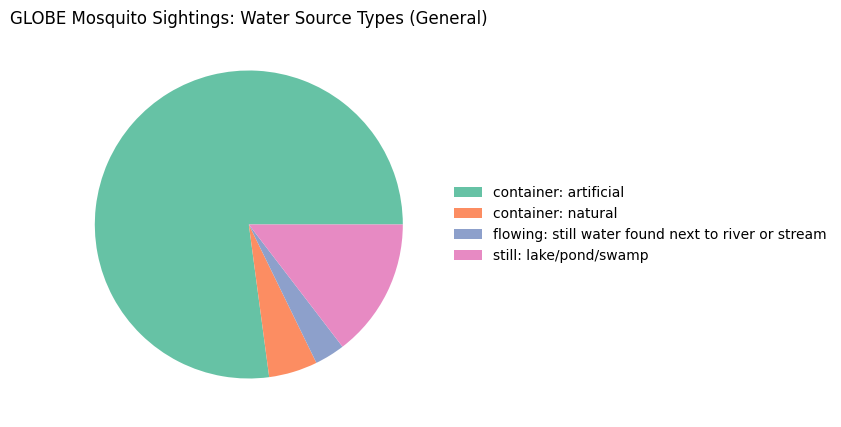

In [11]:
# Pie chart of water types
types = mosquito[['SiteId', 'WaterSourceType']].groupby('WaterSourceType', as_index=False).count()

plt.figure(figsize=(5, 5))
patches, texts = plt.pie(x = types['SiteId'],
                         colors = sns.color_palette('Set2'))  # Enter your chosen color palette here
plt.title("GLOBE Mosquito Sightings: Water Source Types (General)")
plt.legend(patches, types['WaterSourceType'],
           loc = 'center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

In [12]:
# What is the median larvae count by country?
mosquito_avg = mosquito.groupby('CountryCode')['LarvaeCountProcessed'].mean()
mosquito_avg

,LarvaeCountProcessed
CountryCode,
ARE,5.000000
ARG,116.108108
AUS,2.500000
BEL,NaN
BEN,38.598198
...,...
UKR,NaN
URY,0.043478
USA,667.935961


Let's make a map showing the larvae count by country.

In [13]:
countries = gpd.read_file('https://github.com/geo-di-lab/emerge-lessons/raw/refs/heads/main/docs/data/world_countries.zip').to_crs(epsg=4326)
mosquito_avg = countries.merge(mosquito_avg, left_on='ISO_CC', right_on='CountryCode', how='left')

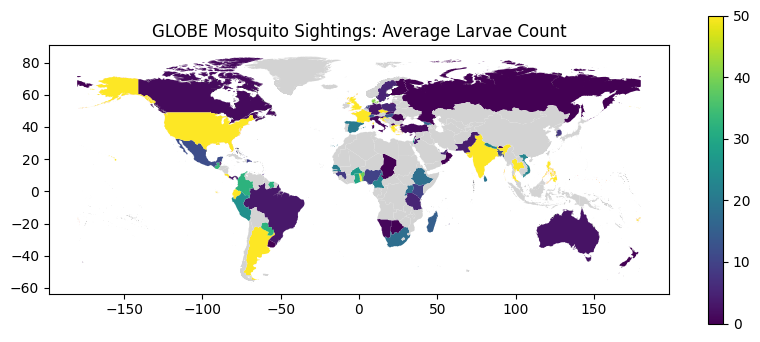

In [14]:
fig, ax = plt.subplots(figsize = (10, 4))

mosquito_avg.plot(column = 'LarvaeCountProcessed', cmap = 'viridis',
                     legend = True, vmin = 0, vmax = 50, ax = ax,
                     missing_kwds = {'color': 'lightgrey'})
plt.title('GLOBE Mosquito Sightings: Average Larvae Count')
plt.show()

# Land Cover

In [15]:
land_cover = gpd.read_file('https://github.com/geo-di-lab/emerge-lessons/raw/refs/heads/main/docs/data/globe_land_cover.zip')
land_cover.head()

,CountryCode,CountryName,Elevation,DataSource,DownwardCaption,DownwardExtraData,DownwardPhotoUrl,DryGround,EastCaption,EastClassifications,EastExtraData,EastPhotoUrl,Feature1Caption,Feature1ExtraData,Feature1PhotoUrl,Feature2Caption,Feature2ExtraData,Feature2PhotoUrl,Feature3Caption,Feature3ExtraData,Feature3PhotoUrl,Feature4Caption,Feature4ExtraData,Feature4PhotoUrl,FieldNotes,GlobeTeams,LandCoverId,LeavesOnTrees,LocationAccuracyM,LocationMethod,MeasuredAt,MeasurementElevation,MeasurementLatitude,MeasurementLongitude,MucCode,MucDescription,MucDetails,Muddy,NorthCaption,NorthClassifications,NorthExtraData,NorthPhotoUrl,RainingSnowing,SnowIce,SouthCaption,SouthClassifications,SouthExtraData,SouthPhotoUrl,StandingWater,UpwardCaption,UpwardExtraData,UpwardPhotoUrl,Userid,WestCaption,WestClassifications,WestExtraData,WestPhotoUrl,OrganizationId,OrganizationName,Protocol,SiteId,SiteName,MeasuredDate,geometry
0,ITA,Italy,489.2,GLOBE Observer App,None,None,https://data.globe.gov/system/photos/2024/12/3...,true,None,None,None,https://data.globe.gov/system/photos/2024/12/3...,"Snag C. sativa, 40 cm, cl 2, #01 #04 #12","((compassData.heading: 182, compassData.horizo...",https://data.globe.gov/system/photos/2024/12/3...,"Log 70 cm, C. sativa, cl 2, #04 #01 #12","((compassData.heading: 182, compassData.horizo...",https://data.globe.gov/system/photos/2024/12/3...,Stump of C. sativa 230 cm,"((compassData.heading: null, compassData.horiz...",https://data.globe.gov/system/photos/2024/12/3...,None,None,None,Old Coppice of Castanea sativa,[Conservazione Natura Universita Tuscia],78608,false,8,automatic,2024-12-31 15:07:00.000,492.4,42.1818,12.1825,None,None,,false,None,None,None,https://data.globe.gov/system/photos/2024/12/3...,false,false,None,None,None,https://data.globe.gov/system/photos/2024/12/3...,false,None,None,https://data.globe.gov/system/photos/2024/12/3...,128342138,None,None,None,https://data.globe.gov/system/photos/2024/12/3...,17453129,Italy Citizen Science,land_covers,376869,33TTG673738,2024-12-31,POINT (12.18229 42.18175)
1,MDG,Madagascar,1350.1,GLOBE Observer App,None,None,https://data.globe.gov/system/photos/2024/12/3...,true,None,"90% MUC 01 (n) [Trees, Closely Spaced, Evergre...",None,https://data.globe.gov/system/photos/2024/12/3...,None,None,None,None,None,None,None,None,None,None,None,None,Arbres plantés par l'équipe GLOBE avec la comm...,"[Africa 2024 Regional Meeting, Coordinating Of...",77695,true,10,automatic,2024-12-31 11:29:00.000,1340.6,-18.7576,47.5615,M01,"Trees, Closely Spaced, Evergreen - Needle Leaved",n,false,None,"90% MUC 01 (n) [Trees, Closely Spaced, Evergre...",None,https://data.globe.gov/system/photos/2024/12/3...,false,false,None,"90% MUC 01 (n) [Trees, Closely Spaced, Evergre...",None,https://data.globe.gov/system/photos/2024/12/3...,false,None,None,https://data.globe.gov/system/photos/2024/12/3...,2538037,None,"90% MUC 01 (n) [Trees, Closely Spaced, Evergre...",None,https://data.globe.gov/system/photos/2024/12/3...,6508873,Madagascar GLOBE v-School,land_covers,373647,38KQE700240,2024-12-31,POINT (47.56096 -18.75807)
2,MDG,Madagascar,1324.7,GLOBE Observer App,None,None,https://data.globe.gov/system/photos/2024/12/3...,true,None,"60% MUC 93 [Urban, Roads and Parking]",None,https://data.globe.gov/system/photos/2024/12/3...,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Africa 2024 Regional Meeting, Coordinating Of...",77691,true,10,automatic,2024-12-31 12:07:00.000,1324.8,-18.7944,47.5799,M93,"Urban, Roads and Parking",,false,None,"60% MUC 93 [Urban, Roads and Parking]",None,https://data.globe.gov/system/photos/2024/12/3...,false,false,None,"60% MUC 93 [Urban, Roads and Parking]",None,https://data.globe.gov/system/photos/2024/12/3...,false,None,None,https://data.globe.gov/system/photos/2024/12/3...,2538037,None,"60% MUC 93 [Urban, Roads and Parking]",None,https://data.globe.gov/system/photos/2024/12/3...,6508873,Madagascar GLOBE v-School,land_covers,373642,38KQE719199,2024-12-31,POIN

In [16]:
land_cover.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 50766 entries, 0 to 50765
Data columns (total 64 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CountryCode           48359 non-null  object        
 1   CountryName           48359 non-null  object        
 2   Elevation             50766 non-null  object        
 3   DataSource            50766 non-null  object        
 4   DownwardCaption       22409 non-null  object        
 5   DownwardExtraData     22405 non-null  object        
 6   DownwardPhotoUrl      39583 non-null  object        
 7   DryGround             43436 non-null  object        
 8   EastCaption           23641 non-null  object        
 9   EastClassifications   14314 non-null  object        
 10  EastExtraData         23636 non-null  object        
 11  EastPhotoUrl          42403 non-null  object        
 12  Feature1Caption       337 non-null    object        
 13  Feature1

In [17]:
len(land_cover)

50766

There are slightly more observations submitted for GLOBE Land Cover than Mosquito Habitat Mapper, 52,020 observations.

In [18]:
len(land_cover['CountryCode'].unique())

98

A helpful part of the land cover dataset is the MUC classifications. MUC, Modified UNESCO Classification, is a classification system with different land use types.

In [19]:
# Let's see the different MUC codes
len(land_cover['MucCode'].unique())

154

In [20]:
# What are the most common MUC codes by country?
land_cover_muc = land_cover.dropna(subset=['MucCode'])

muc = land_cover_muc.groupby('CountryCode')['MucDescription'] \
    .apply(lambda x: x.value_counts().idxmax()).reset_index(name='MucDescription')
muc['Count'] = land_cover_muc.groupby('CountryCode')['MucDescription'] \
    .apply(lambda x: x.value_counts().max()).values

muc

,CountryCode,MucDescription,Count
0,ARE,"Barren, Bare Rock",1
1,ARG,"Cultivated Land, Non-Agriculture, Parks and At...",135
2,AUS,"Herbaceous/Grassland, Short Grass",8
3,AUT,"Barren, Dirt/Other",1
4,BEL,"Herbaceous/Grassland, Short Grass",2
...,...,...,...
78,UKR,"Urban, Other",8
79,URY,Herbaceous Vegetation,8
80,USA,"Herbaceous/Grassland, Short Grass",2788
81,VNM,"Urban, Commercial Property",6


In [21]:
# We can check that this is correct by checking one of the countries:
land_cover[(land_cover['CountryCode'] == 'USA') &
 (land_cover['MucDescription'] == 'Herbaceous/Grassland, Short Grass')]

,CountryCode,CountryName,Elevation,DataSource,DownwardCaption,DownwardExtraData,DownwardPhotoUrl,DryGround,EastCaption,EastClassifications,EastExtraData,EastPhotoUrl,Feature1Caption,Feature1ExtraData,Feature1PhotoUrl,Feature2Caption,Feature2ExtraData,Feature2PhotoUrl,Feature3Caption,Feature3ExtraData,Feature3PhotoUrl,Feature4Caption,Feature4ExtraData,Feature4PhotoUrl,FieldNotes,GlobeTeams,LandCoverId,LeavesOnTrees,LocationAccuracyM,LocationMethod,MeasuredAt,MeasurementElevation,MeasurementLatitude,MeasurementLongitude,MucCode,MucDescription,MucDetails,Muddy,NorthCaption,NorthClassifications,NorthExtraData,NorthPhotoUrl,RainingSnowing,SnowIce,SouthCaption,SouthClassifications,SouthExtraData,SouthPhotoUrl,StandingWater,UpwardCaption,UpwardExtraData,UpwardPhotoUrl,Userid,WestCaption,WestClassifications,WestExtraData,WestPhotoUrl,OrganizationId,OrganizationName,Protocol,SiteId,SiteName,MeasuredDate,geometry
10,USA,United States,235.5,GLOBE Observer App,None,None,https://data.globe.gov/system/photos/2024/12/3...,false,None,"10% MUC 11 (n) [Trees, Loosely Spaced, Evergre...",None,https://data.globe.gov/system/photos/2024/12/3...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,77690,false,8,automatic,2024-12-31 17:57:00,234.6,39.1858,-86.7784,M43,"Herbaceous/Grassland, Short Grass",,false,None,"80% MUC 02 (b) [Trees, Closely Spaced, Deciduo...",None,https://data.globe.gov/system/photos/2024/12/3...,true,false,None,"30% MUC 11 (n) [Trees, Loosely Spaced, Evergre...",None,https://data.globe.gov/system/photos/2024/12/3...,false,None,None,https://data.globe.gov/system/photos/2024/12/3...,24905746,None,"10% MUC 11 (n) [Trees, Loosely Spaced, Evergre...",None,https://data.globe.gov/system/photos/2024/12/3...,17043304,United States of America Citizen Science,land_covers,52378,16SEJ191374,2024-12-31,POINT (-86.77885 39.18563)
22,USA,United States,235.5,GLOBE Observer App,None,None,https://data.globe.gov/system/photos/2024/12/3...,false,None,"10% MUC 11 (n) [Trees, Loosely Spaced, Evergre...",None,https://data.globe.gov/system/photos/2024/12/3...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,77679,false,6,automatic,2024-12-30 18:36:00,233.2,39.1859,-86.7783,M43,"Herbaceous/Grassland, Short Grass",,false,None,"80% MUC 02 (b) [Trees, Closely Spaced, Deciduo...",None,https://data.globe.gov/system/photos/2024/12/3...,false,false,None,"30% MUC 11 (n) [Trees, Loosely Spaced, Evergre...",None,https://data.globe.gov/system/photos/2024/12/3...,false,None,None,https://data.globe.gov/system/photos/2024/12/3...,24905746,None,"10% MUC 11 (n) [Trees, Loosely Spaced, Evergre...",None,https://data.globe.gov/system/photos/2024/12/3...,17043304,United States of America Citizen Science,land_covers,52378,16SEJ191374,2024-12-30,POINT (-86.77885 39.18563)
38,USA,United States,235.5,GLOBE Observer App,None,None,https://data.globe.gov/system/photos/2024/12/2...,false,None,"10% MUC 11 (n) [Trees, Loosely Spaced, Evergre...",None,https://data.globe.gov/system/photos/2024/12/2...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,77668,false,21,automatic,2024-12-29 17:49:00,233.3,39.1859,-86.7784,M43,"Herbaceous/Grassland, Short Grass",,false,None,"80% MUC 02 (b) [Trees, Closely Spaced, Deciduo...",None,https://data.globe.gov/system/photos/2024/12/2...,false,false,None,"30% MUC 11 (n) [Trees, Loosely Spaced, Evergre...",None,https://data.globe.gov/system/photos/2024/12/2...,false,None,None,https://data.globe.gov/system/photos/2024/12/2...,24905746,None,"10% MUC 11 (n) [Trees, Loosely Spaced, Evergre...",None,https://data.globe.gov/system/photos/2024/12/2...,17043304,United States of America Citizen Science,land_covers,52378,16SEJ191374,2024-12-29,POINT (-86.77885 39.18563)
42,USA,United States,235.5,GLOBE Observer App,None,None,https://data.globe.gov/system/photos/2024/12/2...,false,None,"10% MUC 11 (n) [Trees, Loosely Spaced, Evergre...",None,https://data.globe.gov/system/photos/2024/12/2...,None,None,No

In [22]:
muc = countries.merge(muc, left_on='ISO_CC', right_on='CountryCode', how='left')

In [23]:
# There are general categories that each fall into
muc_list = ['Barren', 'Closed Forest', 'Cultivated', 'Herbaceous', 'Open Water', 'Trees', 'Urban', 'Wetlands', 'Woodland']

for muc_code in muc_list:
    muc.loc[muc['MucDescription'].str.contains(muc_code, na=False), 'MucDescriptionShort'] = muc_code

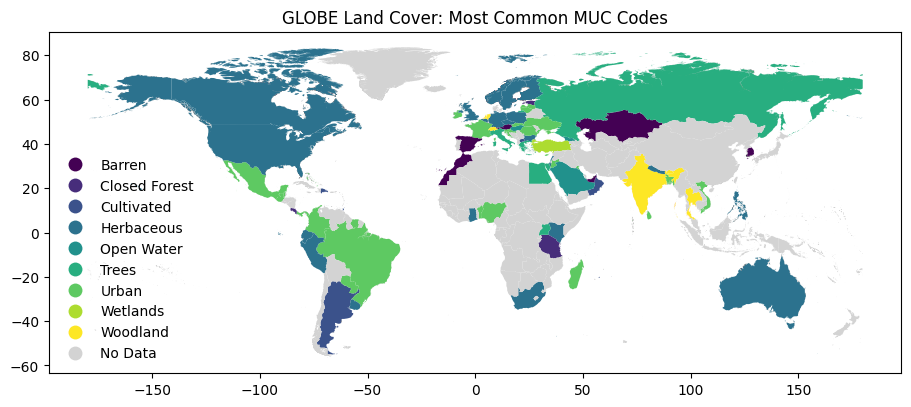

In [24]:
fig, ax = plt.subplots(figsize = (11, 5))

muc.plot(column = 'MucDescriptionShort', cmap = 'viridis',
                     legend = True, ax = ax,
                     missing_kwds = {'color': 'lightgrey', 'label': 'No Data'},
                     legend_kwds={'loc': 'lower left', 'frameon': False})
plt.title('GLOBE Land Cover: Most Common MUC Codes')
plt.show()